In [0]:
import keras
from matplotlib.pyplot import imshow

Using TensorFlow backend.


In [0]:
# Напиши в readme хотя бы кратко о чем проект и что ты используешь
# дай ссылку на данные и веса модели и скажи куда их надо положить
# сделай .py файл, в котором будет открываться модель и в ноутбуке просто импорти ее, то есть раздели обучение и инференс

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
a = r'C:/Users/Dmitry/PycharmProjects/telegrambots/first_bot/data/'

In [0]:
b = str(1) + '.png'

In [0]:
a +b

'C:/Users/Dmitry/PycharmProjects/telegrambots/first_bot/data/1.png'

**Датагенератор для создания большого числа картинок**

In [0]:
from keras.preprocessing.image import ImageDataGenerator
train_dir = '/content/data/'
train_dir = '/content/drive/My Drive/banana projects/anime/data'
train_datagen = ImageDataGenerator(rescale=1.0/255.0, rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   fill_mode='nearest',
                                   horizontal_flip=True,
                                   validation_split = 0.3,
                                   data_format='channels_last'
                                  )
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   class_mode='input',
                                                   batch_size = 20,
                                                   target_size = (64, 64))
 

OSError: ignored

In [0]:
from matplotlib.pyplot import imshow

# все импорты делай в начале ноутбука/скрипта

**Автоэнкодер**

In [0]:
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Input
from keras.layers import Input, Dense, Flatten, Reshape
from keras.models import Model
from keras.layers import Reshape
def create_deep_conv_ae():
    input_img = Input(shape=(64, 64, 3))

    x = Conv2D(512, (8, 8), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(64, (2, 2), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    encoded = Conv2D(1, (8, 8), activation='relu', padding='same')(x)
    vector = Flatten()(encoded)
    vector = Dense(256, activation='relu')(vector)
    to_dec = Reshape((16,16,1))(vector)
    # vector.reshape(7,7,1)
    
    input_encoded = Input(shape=(16,16, 1))
    
    x = Conv2D(64, (2, 2), activation='relu', padding='same')(input_encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(512, (2, 2), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(3, (8, 8), activation='sigmoid', padding='same')(x)
    
    encoder = Model(input_img, to_dec, name="encoder")
    decoder = Model(input_encoded, decoded, name="decoder")
    autoencoder = Model(input_img, decoder(encoder(input_img)), name="autoencoder")
    return encoder, decoder, autoencoder

In [0]:
encoder, decoder, autoencoder = create_deep_conv_ae()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

**Обучение модели на генераторе**

In [0]:
autoencoder.fit(train_generator,
                epochs=100,
                shuffle=True)

**Процесс сохранения весов после обучения я пропустил, поэтому оставил только код для их загрузки из локальной памяти колаба**

In [0]:
autoencoder.load_weights("/content/model.h5")

In [0]:
weights_encoder = autoencoder.layers[1].get_weights()

In [0]:
encoder.set_weights(weights_encoder)

In [0]:
import numpy as np

In [0]:
path = '/content/drive/My Drive/banana projects/anime/data/1.png'
encoder.predict(plt.imread(path).reshape(1, 64, 64, 3)).shape

(1, 16, 16, 1)

In [0]:
import os
import glob
import tensorflow.keras.backend as K
from keras import backend as L
import matplotlib.pyplot as plt
import cv2
path = '/content/drive/My Drive/banana projects/anime/data/'
count = 0
train = np.zeros(shape=(1, 16, 16, 1))
with os.scandir(path) as it:
    for entry in it:
        if entry.name.endswith(".png") and entry.is_file():
            count+=1
            img = cv2.imread(entry.path)
            img = img.reshape(1, 64, 64, 3)
            # img = K.constant(img)
            # sess = L.get_session()
            vector = encoder.predict(img) #.eval(session=sess)
            train = np.append(train, vector, axis=0)
            # train.append(vector)

In [0]:
train = train[1:]

In [0]:
# saving
from numpy import asarray
from numpy import save
encodings = asarray(train)
save('encodings.npy', encodings)
# loading

from numpy import load
# load array
encodings = load('encodings.npy')
# print the array
print(encodings)

In [0]:
from numpy import load
# load array
data = load('data.npy')
# print the array


In [0]:
train.shape

(21551, 16, 16, 1)

In [0]:
example = train[0]

matrix[i][j] = cos_sim(train[i].reshape(256,), train[j].reshape(256,))

In [0]:
train[0].reshape(256,)

In [0]:
import numpy as np
# def coska(v1):
  # return v1 @ train[0] / (np.linalg.norm(v1) * np.linalg.norm(train[0]))

coska = lambda v1: v1 @ train[0].reshape(256,) / (np.linalg.norm(v1) * np.linalg.norm(train[0].reshape(256,)))
vfunc = np.vectorize(coska)
vfunc(train)


ValueError: ignored

In [0]:
from sklearn.metrics.pairwise import cosine_similarity
sim = cosine_similarity(train.reshape(21551, 256,), train[0].reshape(1, 256))

In [0]:
sim.argmax()

0

**Пропуск через энкодер первой тысячи картинок(обучение если что происходило на всех картинках, а не на тысячи)**

In [0]:
import glob
import tensorflow.keras.backend as K
from keras import backend as L
import matplotlib.pyplot as plt
import cv2
train = []
count = 0
for filepath in glob.iglob('/content/drive/My Drive/banana projects/anime/data/*.png'):
    count+=1
    img = cv2.imread(filepath)
    img = img.reshape(1, 64, 64, 3)
    # img = K.constant(img)
    # sess = L.get_session()
    vector = encoder.predict(img) #.eval(session=sess)
    train.append(vector)
    if count >= 1000:
      break
    # break

In [0]:

len(train)

1000

**Создание пустого датафрейма размера 1000x1000**

In [0]:
import pandas as pd
indexes= ['str_' + str(i) for i in range(len(train))]
columnes = ['col_' + str(i) for i in range(len(train))]
data = pd.DataFrame(index=indexes, columns=columnes)
data


,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,...,col_9960,col_9961,col_9962,col_9963,col_9964,col_9965,col_9966,col_9967,col_9968,col_9969,col_9970,col_9971,col_9972,col_9973,col_9974,col_9975,col_9976,col_9977,col_9978,col_9979,col_9980,col_9981,col_9982,col_9983,col_9984,col_9985,col_9986,col_9987,col_9988,col_9989,col_9990,col_9991,col_9992,col_9993,col_9994,col_9995,col_9996,col_9997,col_9998,col_9999
str_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
str_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
str_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
str_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
str_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
str_9995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
str_9996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
str_9997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
str_9998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Функция подсчета расстояния между векторами картинок и так же тестовый пример ее использования**

In [0]:

import numpy as np
def cos_sim(v1, v2):
  return v1 @ v2 /( np.linalg.norm(v1) * np.linalg.norm(v2))
cos_sim(train[0].reshape(256,), train[10].reshape(256,))

0.7664039263845956

In [0]:
matrix = np.zeros(shape=(len(train), len(train)))
for i in range(matrix.shape[0]):
  for j in range(matrix.shape[1]):
    matrix[i][j] = cos_sim(train[i].reshape(256,), train[j].reshape(256,))


In [0]:
import pandas as pd
omg = pd.DataFrame(data=matrix)

In [0]:
import pandas as pd
omg = pd.read_csv('/content/drive/My Drive/banana projects/anime/omg.csv')

In [0]:
omg.shape

(2314, 21552)

In [0]:
omg.to_csv('/content/drive/My Drive/banana projects/anime/omg.csv', index=False)

In [0]:
omg.to_csv('omg.csv')
!cp omg.csv "drive/My Drive/banana projects/anime"

**Заполнение датафрейма "похожестью". По диагонали находятся единицы**

In [0]:
# намного эффективнее это делать не в датафрейме, а в матрице np.zeros(1000, 1000), а потом уже кастить в датафрейм

similarity = []
for i in range(len(train)):
  for j in range(len(train)):
    similarity.append(cos_sim(train[i].reshape(256,), train[j].reshape(256,)))
  data['col_'+str(i)] = similarity
  similarity = []
data.columns = ['img_' + str(i) for i in range(len(train))]
data.index =  ['img_' + str(i) for i in range(len(train))]

In [0]:
data.columns = ['img_' + str(i) for i in range(len(train))]
data.index =  ['img_' + str(i) for i in range(len(train))]

In [0]:
from google.colab.patches import cv2_imshow

**Функция для вывода самых похожих картинок. Параметр number - номер картинки, the_most_similar - параметр, который отвечает за вывод только самой похожей**

In [0]:
# неплохо бы сделать еще функцию, которая принимает любую картинку и ищет похожую для нее из базы картинок

DIR = '/content/drive/My Drive/banana projects/anime/data/'
def similarities( number, data=data, the_most_similar=True):
  sort = data['img_' + str(number)].sort_values(ascending=False)[1:10]
  if the_most_similar:
    plt.imshow(plt.imread(DIR + str(int(sort.index[0].replace('img_', ''))) + '.png'))


**Во-первых, модель научилась сравнивать картинки по некоторым общим признакам схожести(цвет волос, цвет глаз)**

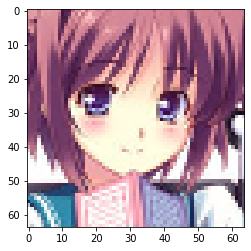

In [0]:
similarities(7)

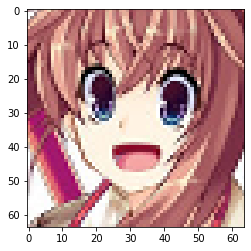

In [0]:
plt.imshow(plt.imread('/content/drive/My Drive/banana projects/anime/data/7.png'))

**Во-вторых, модель научилась сравнивать картинки по расположению голов персонажей**

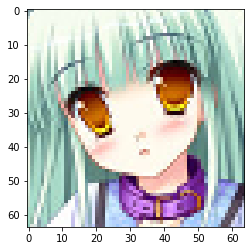

In [0]:
similarities(14)

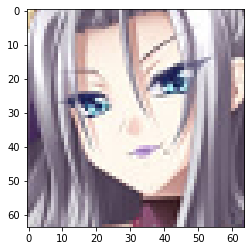

In [0]:
plt.imshow(plt.imread('/content/drive/My Drive/banana projects/anime/data/14.png'))

In [0]:
# так же как я понял модель научилась определять сходство по эмоциям и бровям

**В третьих, на удивление, она смогла научиться сравнивать их по эмоциям(скошенные брови, слегка искривленный рот)**

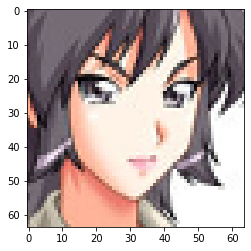

In [0]:
similarities(100)

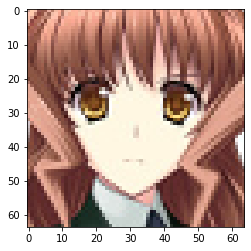

In [0]:
plt.imshow(plt.imread('/content/drive/My Drive/banana projects/anime/data/100.png'))

In [0]:
# еще я предлагаю все-таки сделать отображение
# картинка -> вектор из 256 чисел (ровно столько, сколько у тебя в Dense слое после энкодера)
# и потом попробовать кластеризовать картинки и сделать отображение их на плоскость с помощью TSNe или PCA
# это даст прикольную визуализацию и возможно они разобъются по кластерам по какому-то интересному признаку
# эту штуку можно будет вставить в ридми как пример, и это будет неплохая демонстрация что делает проект
# а сохроаненные веса и воспроизводимая инструкация позволят повторить/дотюнить то, что ты делал 

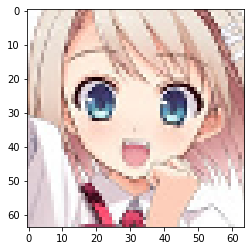

In [0]:
similarities(101)

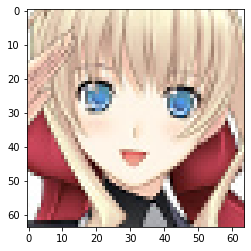

In [0]:
plt.imshow(plt.imread('/content/drive/My Drive/banana projects/anime/data/101.png'))

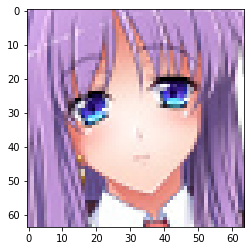

In [0]:
similarities(104)

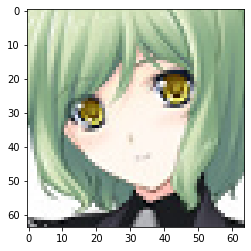

In [0]:
plt.imshow(plt.imread('/content/drive/My Drive/banana projects/anime/data/104.png'))

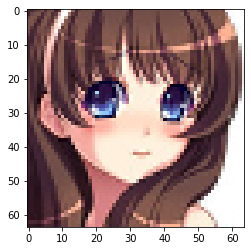

In [0]:
similarities(111)

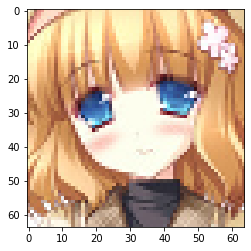

In [0]:
plt.imshow(plt.imread('/content/drive/My Drive/banana projects/anime/data/111.png'))